In [29]:
# librairies

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

# datasets 
file_1 = r"..\data\raw\amz_uk_processed_data.csv"
# file_2 = r"..\data\raw\amazon_categories_us.csv"
# file_3 = r"..\data\raw\amazon_products_us.csv"

df_amz_uk = pd.read_csv(file_1)
# df_amz_us = pd.read_csv(file_3)



# First Step : Exploration 

## Check for null, NaN and duplicate values

In [3]:
df_amz_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


In [4]:
# Check if there is any null values 
df_amz_uk.isnull().sum()


asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

In [5]:
# Check if there is any NaN values
df_amz_uk.isna().sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

In [6]:
# Let's check if there is any dupplicate
df_amz_uk.duplicated().sum()


0

## Second step : descriptive analysis

In [7]:
df_amz_uk.describe(include='all')


,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
count,2222742,2222742,2222742,2222742,2.222742e+06,2.222742e+06,2.222742e+06,2222742,2.222742e+06,2222742
unique,2222742,2073245,1770232,2222742,NaN,NaN,NaN,2,NaN,296
top,B09B96TG33,OYhmc Portable Pedal Exerc,https://m.media-amazon.com/images/I/614tIPGtgl...,https://www.amazon.co.uk/dp/B09B96TG33,NaN,NaN,NaN,False,NaN,Sports & Outdoors
freq,1,723,1928,1,NaN,NaN,NaN,2216724,NaN,826076
mean,NaN,NaN,NaN,NaN,2.031870e+00,3.821617e+02,9.425737e+01,NaN,1.856902e+01,NaN
std,NaN,NaN,NaN,NaN,2.185497e+00,5.020752e+03,3.606225e+02,NaN,1.919030e+02,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+01,NaN,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.990000e+01,NaN,0.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,4.400000e+00,4.400000e+01,4.771000e+01,NaN,0.000000e+00,NaN


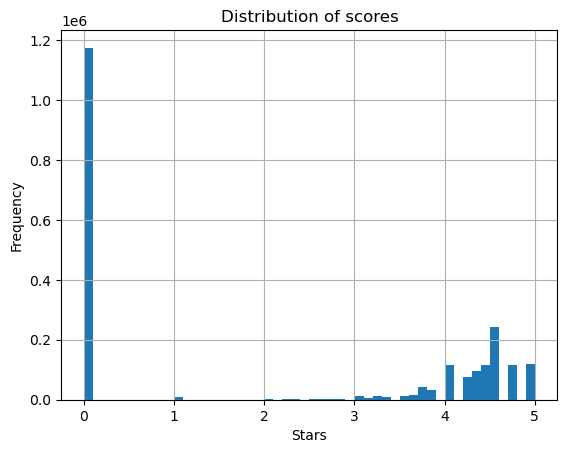

In [9]:
# Let's see stars distribution
df_amz_uk['stars'].hist(bins=50)
plt.title('Distribution of scores')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

We can see that a significant number of products do not have a score assigned to them. 

Now we're going to take a closer look at the best-selling categories 

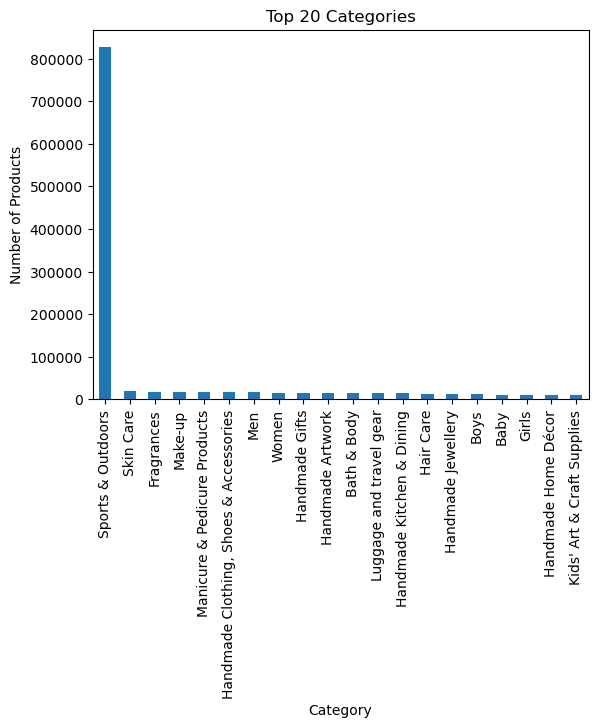

In [18]:
df_amz_uk['categoryName'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

We can see that the sport & outdoor category is the one that sells the most. 

To finished this basic analysis, let's see if there is any correlation between the column bougthInLastMonth, price, reviews and stars

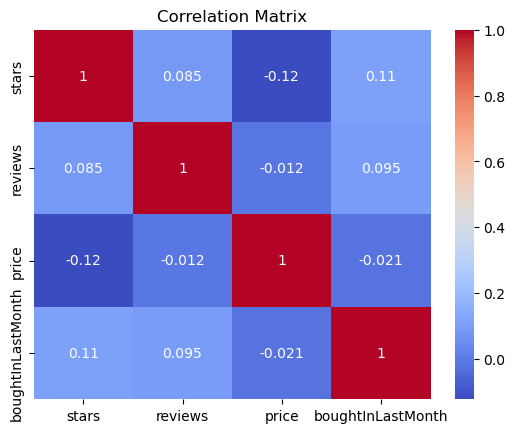

In [17]:
corr = df_amz_uk[['stars', 'reviews', 'price', 'boughtInLastMonth']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


no particular correlation between its parameters

## Analysis of Textual Variables

#### Let's analyse the length of the titles and redundant words 

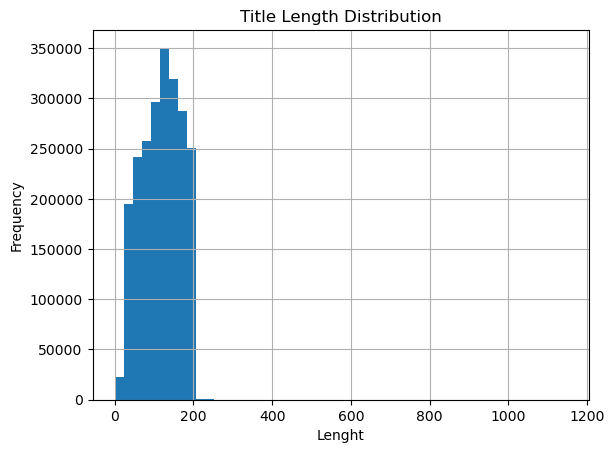

In [16]:
df_amz_uk['title_length'] = df_amz_uk['title'].apply(len)
df_amz_uk['title_length'].hist(bins=50)
plt.title('Title Length Distribution')
plt.xlabel('Lenght')
plt.ylabel('Frequency')
plt.show()


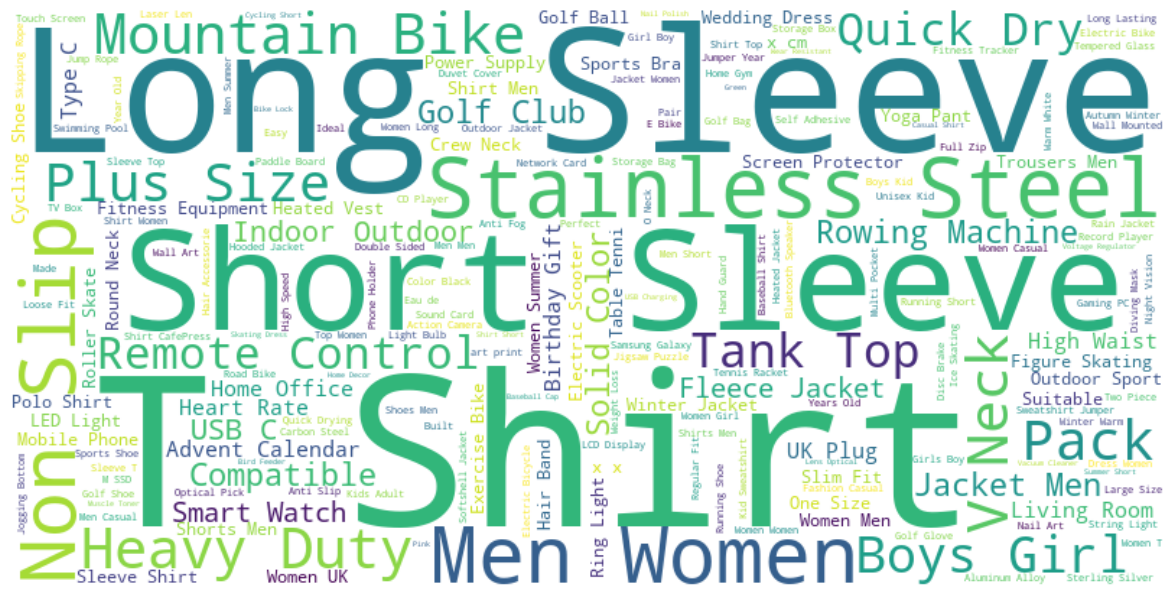

In [15]:
text = ' '.join(df_amz_uk['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


We can see that the words that come up the most are Long Sleeve, Short Sleeve, T shirt, Non Slip. These titles can be related to the clothing and/or sport & outdoors categories.

## Identification of Abnormal Values and Outliers

#### Visualise outliers in numerical variables

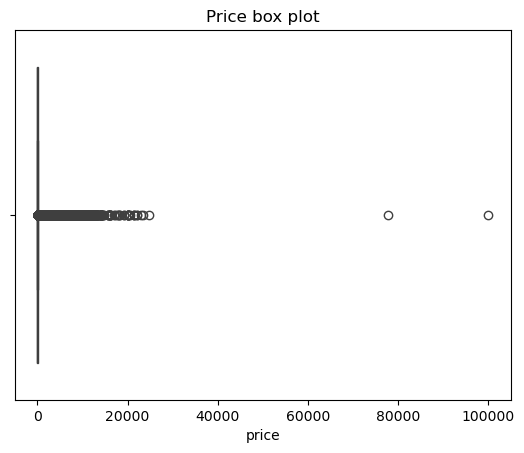

In [20]:
sns.boxplot(x=df_amz_uk['price'])
plt.title('Price box plot')
plt.show()


## Analyse relation between variables

#### Price and stars

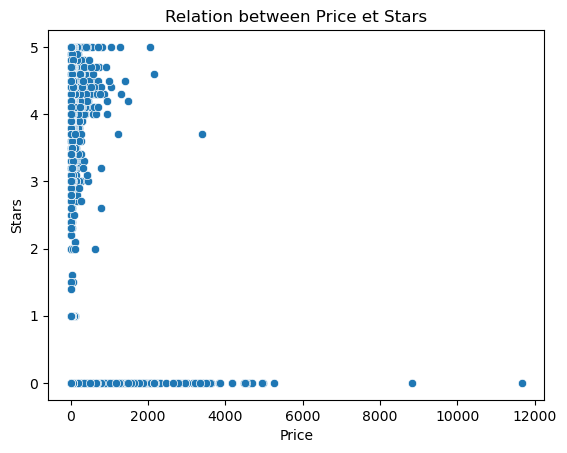

In [23]:
sns.scatterplot(x='price', y='stars', data=df_amz_uk.sample(10000))
plt.title('Relation between Price et Stars')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.show()


#### Reviews and Stars

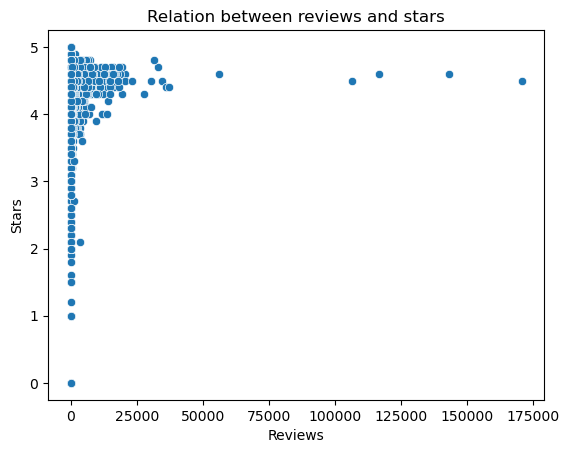

In [24]:
sns.scatterplot(x='reviews', y='stars', data=df_amz_uk.sample(10000))
plt.title('Relation between reviews and stars')
plt.xlabel('Reviews')
plt.ylabel('Stars')
plt.show()


# Second step : Cleaning

In [30]:
def clean_dataset(df):
    """
    Version améliorée du nettoyage avec meilleure gestion des valeurs aberrantes
    """
    df_clean = df.copy()
    
    # Suppression plus sélective
    mask = (
        (df_clean['reviews'] > 0) & 
        (df_clean['price'] > 0) & 
        (df_clean['stars'] > 0) &
        (df_clean['stars'] <= 5)  # Assure que les étoiles sont dans une plage valide
    )
    df_clean = df_clean[mask]
    
    # Utilisation de RobustScaler pour les prix (moins sensible aux outliers)
    scaler = RobustScaler()
    df_clean['price_scaled'] = scaler.fit_transform(df_clean[['price']])
    
    # Suppression des outliers extrêmes uniquement
    price_mask = (df_clean['price_scaled'] > -5) & (df_clean['price_scaled'] < 5)
    df_clean = df_clean[price_mask]
    
    return df_clean

def create_features(df):
    """
    Version améliorée de la création de features avec de meilleures métriques
    """
    df_featured = df.copy()
    
    # Score de popularité amélioré (utilisant log pour mieux gérer les grandes valeurs)
    df_featured['popularity_score'] = np.log1p(df_featured['reviews']) * df_featured['stars']
    
    # Catégories de prix plus granulaires
    df_featured['price_category'] = pd.qcut(
        df_featured['price'], 
        q=5, 
        labels=['very_cheap', 'cheap', 'medium', 'expensive', 'very_expensive']
    )
    
    # Ratio qualité/prix amélioré avec normalisation
    df_featured['value_for_money'] = (df_featured['stars'] * np.log1p(df_featured['reviews'])) / (df_featured['price'] + 1)
    
    # Nouvelles features
    df_featured['is_popular'] = (df_featured['reviews'] > df_featured['reviews'].median()).astype(int)
    df_featured['price_range'] = pd.qcut(df_featured['price'], q=10, labels=False)
    
    # Normalisation des scores
    df_featured['popularity_score'] = (df_featured['popularity_score'] - df_featured['popularity_score'].min()) / \
                                    (df_featured['popularity_score'].max() - df_featured['popularity_score'].min())
    
    df_featured['value_for_money'] = (df_featured['value_for_money'] - df_featured['value_for_money'].min()) / \
                                    (df_featured['value_for_money'].max() - df_featured['value_for_money'].min())
    
    return df_featured

def encode_categories(df):
    """
    Encode les catégories et crée des features pour les catégories principales
    """
    df_encoded = df.copy()
    
    # Encoder les catégories
    le = LabelEncoder()
    df_encoded['category_encoded'] = le.fit_transform(df_encoded['categoryName'])
    
    # Créer des catégories principales (prend le premier mot de la catégorie)
    df_encoded['main_category'] = df_encoded['categoryName'].str.split().str[0]
    
    # One-hot encoding pour les catégories principales
    main_categories_dummies = pd.get_dummies(df_encoded['main_category'], prefix='cat')
    df_encoded = pd.concat([df_encoded, main_categories_dummies], axis=1)
    
    return df_encoded, le

def scale_features(df, features_to_scale):
    """
    Version améliorée de la normalisation utilisant RobustScaler
    """
    scaler = RobustScaler()  # Moins sensible aux outliers que StandardScaler
    df_scaled = df.copy()
    df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    return df_scaled, scaler

def prepare_data_for_modeling(df_raw):
    """
    Pipeline de préparation des données amélioré
    """
    # 1. Nettoyage amélioré
    df_cleaned = clean_dataset(df_raw)
    
    # 2. Création de features améliorée
    df_featured = create_features(df_cleaned)
    
    # 3. Encodage des catégories (garde la fonction originale)
    df_encoded, le = encode_categories(df_featured)
    
    # 4. Normalisation améliorée
    features_to_scale = ['price', 'stars', 'reviews', 'popularity_score', 'value_for_money']
    df_final, scaler = scale_features(df_encoded, features_to_scale)
    
    return df_final, le, scaler

def split_data(df, test_size=0.2, random_state=42):
    """
    Divise les données en ensembles d'entraînement et de test
    """
    # Sélection des features pertinentes pour la modélisation
    features = ['price', 'stars', 'reviews', 'popularity_score', 'value_for_money', 
               'isBestSeller', 'category_encoded'] + [col for col in df.columns if col.startswith('cat_')]
    
    X = df[features]
    y = df['boughtInLastMonth']  # Notre variable cible
    
    # Division stratifiée pour maintenir la distribution des catégories
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=df['category_encoded']
    )
    
    return X_train, X_test, y_train, y_test

=== Statistiques initiales ===

Nombre total d'entrées: 2222742

Valeurs nulles par colonne:
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

Statistiques descriptives:
              stars       reviews         price  boughtInLastMonth
count  2.222742e+06  2.222742e+06  2.222742e+06       2.222742e+06
mean   2.031870e+00  3.821617e+02  9.425737e+01       1.856902e+01
std    2.185497e+00  5.020752e+03  3.606225e+02       1.919030e+02
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000e+00
25%    0.000000e+00  0.000000e+00  1.000000e+01       0.000000e+00
50%    0.000000e+00  0.000000e+00  1.990000e+01       0.000000e+00
75%    4.400000e+00  4.400000e+01  4.771000e+01       0.000000e+00
max    5.000000e+00  1.356658e+06  1.000000e+05       5.000000e+04


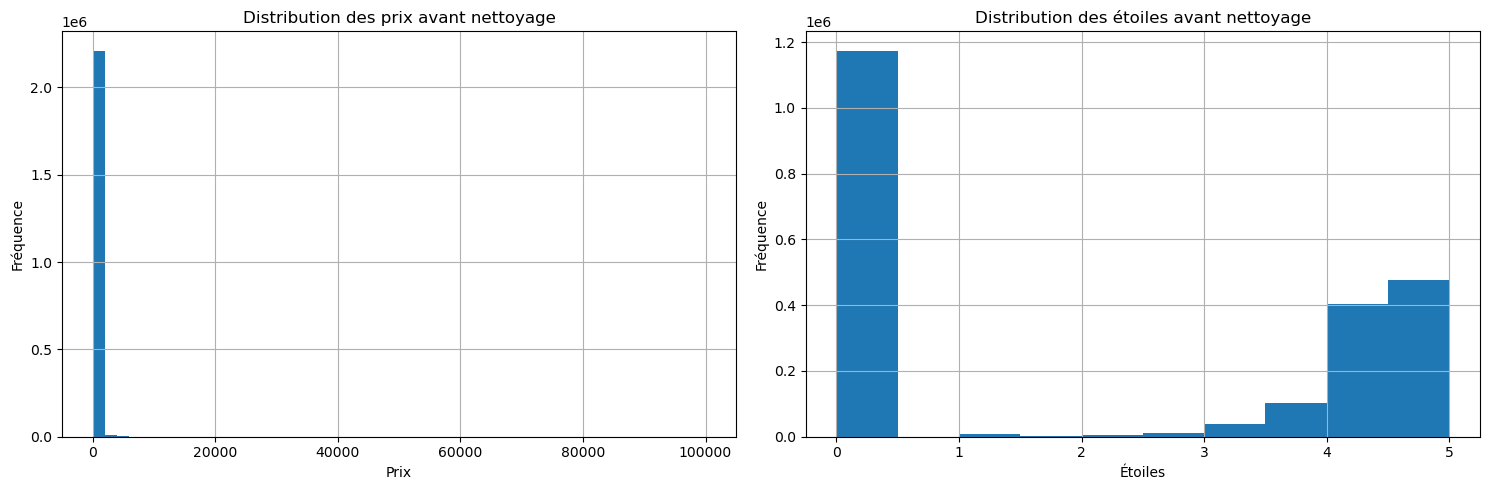


=== Début du nettoyage ===

Statistiques avant nettoyage:
Nombre total de produits: 2222742
Produits avec 0 reviews: 1174420
Produits avec 0 étoiles: 1174420
Produits avec prix nul: 18

Statistiques après nettoyage:
Nombre total de produits: 986083
Produits avec 0 reviews: 0
Produits avec 0 étoiles: 0
Produits avec prix nul: 0

=== Création des features ===


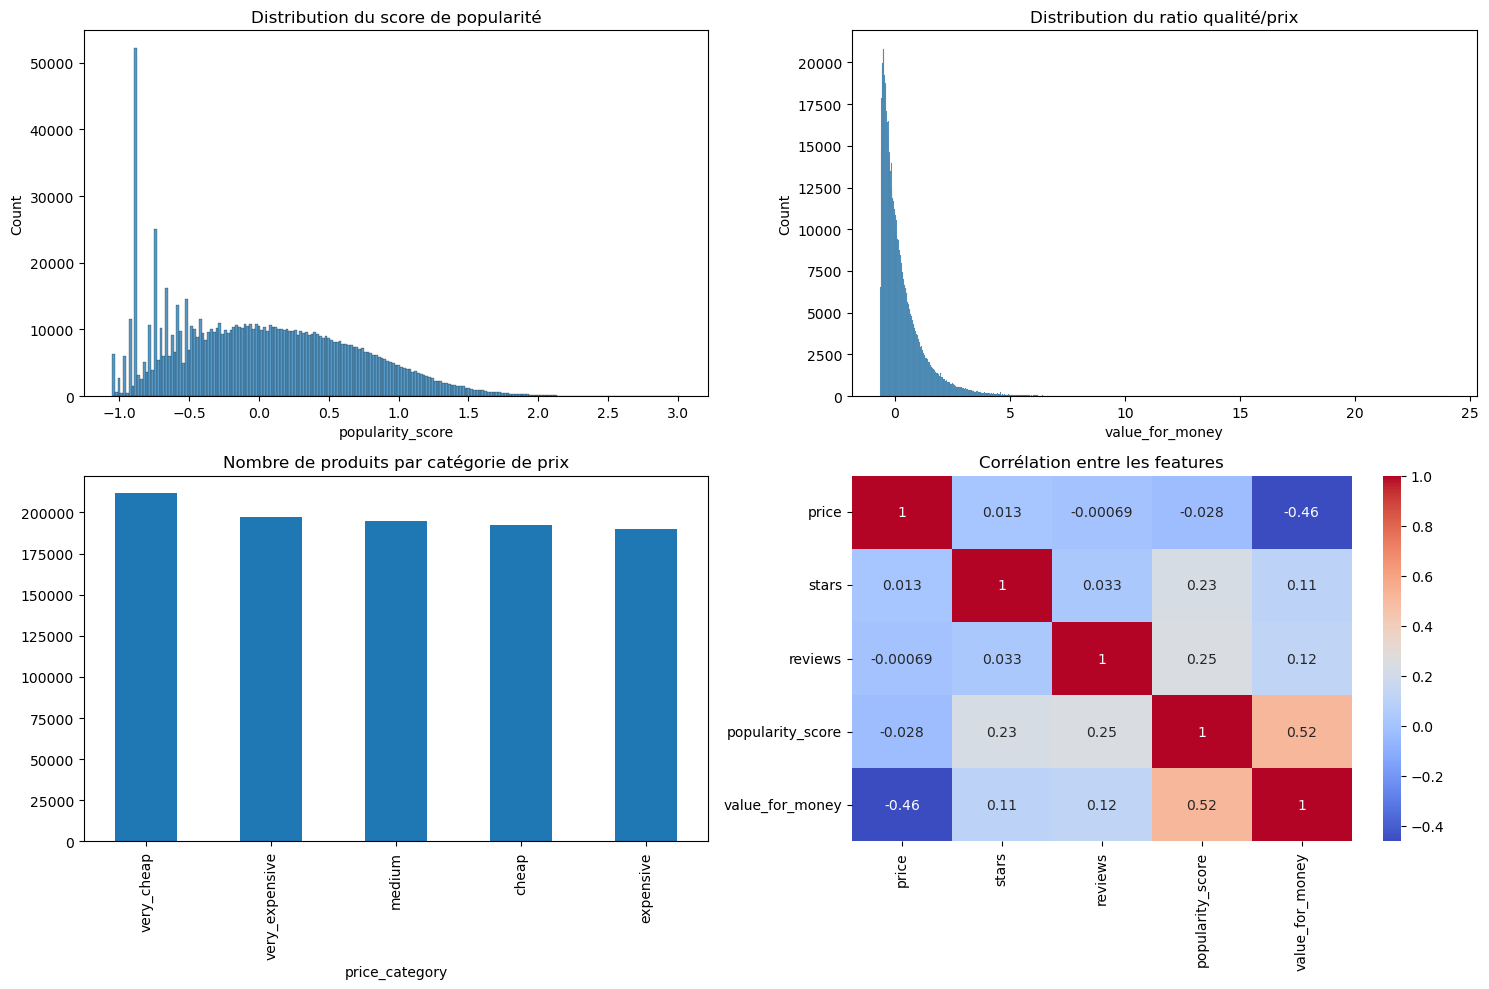


=== Pipeline de nettoyage terminé ===
Les données nettoyées ont été sauvegardées dans 'amazon_uk_processed.csv'


In [31]:
# 1. Chargement et aperçu initial des données
def display_initial_stats(df):
    print("=== Statistiques initiales ===")
    print("\nNombre total d'entrées:", len(df))
    print("\nValeurs nulles par colonne:")
    print(df.isnull().sum())
    print("\nStatistiques descriptives:")
    print(df.describe())
    
    # Visualisation de la distribution des prix et notes avant nettoyage
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    df['price'].hist(bins=50, ax=ax1)
    ax1.set_title('Distribution des prix avant nettoyage')
    ax1.set_xlabel('Prix')
    ax1.set_ylabel('Fréquence')
    
    df['stars'].hist(bins=10, ax=ax2)
    ax2.set_title('Distribution des étoiles avant nettoyage')
    ax2.set_xlabel('Étoiles')
    ax2.set_ylabel('Fréquence')
    
    plt.tight_layout()
    plt.show()

# 2. Exécution du nettoyage
def execute_cleaning(df):
    print("\n=== Début du nettoyage ===")
    
    # Afficher les statistiques avant nettoyage
    print("\nStatistiques avant nettoyage:")
    print("Nombre total de produits:", len(df))
    print("Produits avec 0 reviews:", len(df[df['reviews'] == 0]))
    print("Produits avec 0 étoiles:", len(df[df['stars'] == 0]))
    print("Produits avec prix nul:", len(df[df['price'] == 0]))
    
    # Nettoyage avec la fonction précédente
    df_clean = clean_dataset(df)
    
    # Afficher les statistiques après nettoyage
    print("\nStatistiques après nettoyage:")
    print("Nombre total de produits:", len(df_clean))
    print("Produits avec 0 reviews:", len(df_clean[df_clean['reviews'] == 0]))
    print("Produits avec 0 étoiles:", len(df_clean[df_clean['stars'] == 0]))
    print("Produits avec prix nul:", len(df_clean[df_clean['price'] == 0]))
    
    return df_clean

# 3. Création des features et visualisation
def execute_feature_engineering(df_clean):
    print("\n=== Création des features ===")
    
    # Création des features
    df_featured = create_features(df_clean)
    
    # Encodage des catégories
    df_encoded, le = encode_categories(df_featured)
    
    # Normalisation
    features_to_scale = ['price', 'stars', 'reviews', 'popularity_score', 'value_for_money']
    df_final, scaler = scale_features(df_encoded, features_to_scale)
    
    # Visualiser les nouvelles features
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribution du score de popularité
    sns.histplot(data=df_final, x='popularity_score', ax=axes[0,0])
    axes[0,0].set_title('Distribution du score de popularité')
    
    # Distribution de value_for_money
    sns.histplot(data=df_final, x='value_for_money', ax=axes[0,1])
    axes[0,1].set_title('Distribution du ratio qualité/prix')
    
    # Nombre de produits par catégorie de prix
    df_final['price_category'].value_counts().plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Nombre de produits par catégorie de prix')
    
    # Corrélation entre les features numériques
    numeric_features = ['price', 'stars', 'reviews', 'popularity_score', 'value_for_money']
    sns.heatmap(df_final[numeric_features].corr(), annot=True, cmap='coolwarm', ax=axes[1,1])
    axes[1,1].set_title('Corrélation entre les features')
    
    plt.tight_layout()
    plt.show()
    
    return df_final

# 4. Exécution complète du pipeline
def execute_full_pipeline(df):
    # 1. Affichage des statistiques initiales
    display_initial_stats(df)
    
    # 2. Nettoyage
    df_clean = execute_cleaning(df)
    
    # 3. Feature engineering et visualisation
    df_final = execute_feature_engineering(df_clean)
    
    return df_final

# Code d'exécution
if __name__ == "__main__":
    # Chargement des données
    df_amz_uk = pd.read_csv(file_1)  # Remplacez par votre chemin de fichier
    
    # Exécution du pipeline complet
    df_processed = execute_full_pipeline(df_amz_uk)
    
    # Sauvegarde des données nettoyées (optionnel)
    df_processed.to_csv('amazon_uk_processed.csv', index=False)
    
    print("\n=== Pipeline de nettoyage terminé ===")
    print("Les données nettoyées ont été sauvegardées dans 'amazon_uk_processed.csv'")

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler

def final_clean_dataset(df):
    """
    Nettoyage final avec meilleure gestion des valeurs extrêmes
    """
    df_clean = df.copy()
    
    # Filtrage plus précis
    mask = (
        (df_clean['reviews'] > 0) & 
        (df_clean['price'] > 0) & 
        (df_clean['stars'] > 0) &
        (df_clean['stars'] <= 5) &
        (df_clean['price'] <= df_clean['price'].quantile(0.99))  # Enlève le top 1% des prix
    )
    df_clean = df_clean[mask]
    
    # Log-transformation des prix pour gérer la distribution asymétrique
    df_clean['price_log'] = np.log1p(df_clean['price'])
    
    return df_clean

def final_create_features(df):
    """
    Création de features avec normalisation améliorée
    """
    df_featured = df.copy()
    
    # MinMaxScaler pour garantir des valeurs positives
    mms = MinMaxScaler()
    
    # Score de popularité revisité
    df_featured['reviews_log'] = np.log1p(df_featured['reviews'])
    popularity_raw = df_featured['reviews_log'] * df_featured['stars'] / 5
    df_featured['popularity_score'] = mms.fit_transform(popularity_raw.values.reshape(-1, 1))
    
    # Catégories de prix basées sur les percentiles
    df_featured['price_category'] = pd.qcut(
        df_featured['price_log'],
        q=5,
        labels=['very_cheap', 'cheap', 'medium', 'expensive', 'very_expensive']
    )
    
    # Ratio qualité/prix amélioré
    value_raw = (df_featured['stars'] * df_featured['reviews_log']) / (df_featured['price_log'] + 1)
    df_featured['value_for_money'] = mms.fit_transform(value_raw.values.reshape(-1, 1))
    
    # Nouvelles features plus robustes
    df_featured['price_segment'] = pd.qcut(df_featured['price_log'], q=10, labels=False)
    df_featured['is_high_rated'] = (df_featured['stars'] >= 4).astype(int)
    df_featured['review_segment'] = pd.qcut(
        df_featured['reviews_log'],
        q=5,
        labels=['very_low', 'low', 'medium', 'high', 'very_high']
    )
    
    return df_featured

def final_prepare_data(df_raw):
    """
    Pipeline final de préparation des données
    """
    print("Début du traitement final...")
    print(f"Nombre initial d'entrées: {len(df_raw)}")
    
    # 1. Nettoyage
    df_cleaned = final_clean_dataset(df_raw)
    print(f"Après nettoyage: {len(df_cleaned)} entrées")
    
    # 2. Features
    df_featured = final_create_features(df_cleaned)
    print("Features créées")
    
    # 3. Statistiques finales
    print("\nStatistiques des features principales:")
    for col in ['popularity_score', 'value_for_money', 'stars']:
        print(f"\n{col}:")
        print(df_featured[col].describe())
    
    return df_featured

# Fonction pour visualiser les résultats
def plot_final_distributions(df):
    """
    Visualisation des distributions finales
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Distribution du score de popularité
    sns.histplot(data=df, x='popularity_score', bins=50, ax=axes[0,0])
    axes[0,0].set_title('Distribution du score de popularité (normalisé)')
    
    # Distribution du ratio qualité/prix
    sns.histplot(data=df, x='value_for_money', bins=50, ax=axes[0,1])
    axes[0,1].set_title('Distribution du ratio qualité/prix (normalisé)')
    
    # Prix log-transformés
    sns.histplot(data=df, x='price_log', bins=50, ax=axes[1,0])
    axes[1,0].set_title('Distribution des prix (log)')
    
    # Corrélation
    features = ['price_log', 'stars', 'reviews_log', 'popularity_score', 'value_for_money']
    sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', ax=axes[1,1])
    axes[1,1].set_title('Corrélations')
    
    plt.tight_layout()
    plt.show()

Début du traitement final...
Nombre initial d'entrées: 2222742
Après nettoyage: 1046846 entrées
Features créées

Statistiques des features principales:

popularity_score:
count    1.046846e+06
mean     2.676849e-01
std      1.590637e-01
min      0.000000e+00
25%      1.358369e-01
50%      2.558264e-01
75%      3.816750e-01
max      1.000000e+00
Name: popularity_score, dtype: float64

value_for_money:
count    1.046846e+06
mean     1.337745e-01
std      8.671170e-02
min      0.000000e+00
25%      6.405532e-02
50%      1.216818e-01
75%      1.884073e-01
max      1.000000e+00
Name: value_for_money, dtype: float64

stars:
count    1.046846e+06
mean     4.308185e+00
std      5.660066e-01
min      1.000000e+00
25%      4.100000e+00
50%      4.400000e+00
75%      4.600000e+00
max      5.000000e+00
Name: stars, dtype: float64


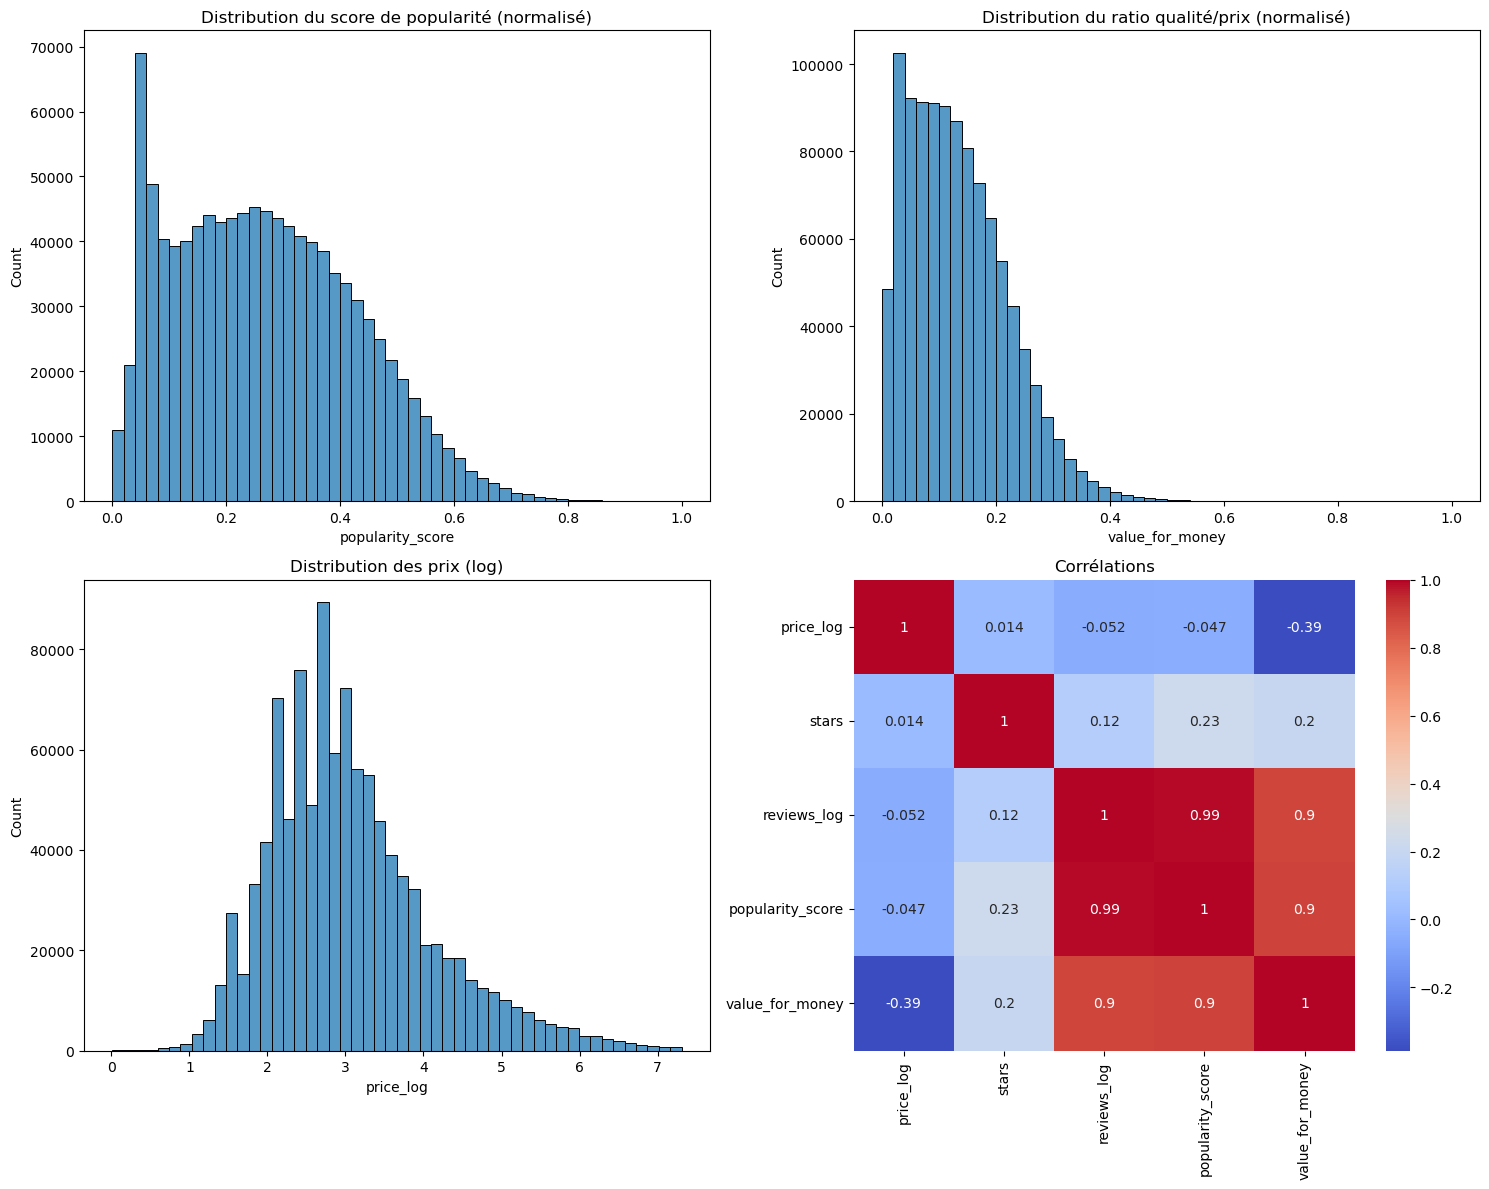

In [ ]:
# Chargement et préparation
df_processed = final_prepare_data(df_amz_uk)

# Visualisation
plot_final_distributions(df_processed)